In [46]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression 

In [35]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [36]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [37]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [38]:
# Convert categorical data to numeric and separate target feature for training data
y_train = train_df["loan_status"]
X_train = train_df.drop(columns= ["loan_status"])
X_train.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [39]:
# Convert categorical data to numeric and separate target feature for testing data
y_test= test_df["loan_status"]
X_test = test_df.drop(columns = ["loan_status"])
X_test.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,n,19.75,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,n,11.52,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,n,6.74,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,n,12.13,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,n,16.08,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [43]:
# add missing dummy variables to testing set
X_dummies_train = pd.get_dummies(X_train)
X_dummies_test= pd.get_dummies(X_test)
print(f"Train: {X_dummies_train.shape}, Test: {X_dummies_test.shape}")
# Convert output labels to 0 and 1
y_label_train = LabelEncoder().fit_transform(train_df['loan_status'])
y_label_train
y_label_test = LabelEncoder().fit_transform(test_df["loan_status"])
y_label_test
# Add missing dummy variables to testing set
for col in X_dummies_train.columns:
    if col not in X_dummies_test.columns:
        X_dummies_test[col]=0
print(f" Train: {X_dummies_train.shape},Test: {X_dummies_test.shape} ")

Train: (12180, 94), Test: (4702, 93)
 Train: (12180, 94),Test: (4702, 94) 


In [49]:
# Train the Logistic Regression model on the unscaled data and print the model score
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_dummies_train, y_label_train)
print(f"Training Data Score: {clf_logistic.score (X_dummies_train, y_label_train)}")
print(f"Training Data Score: {clf_logistic.score (X_dummies_test, y_label_test)}")


Training Data Score: 0.6485221674876848
Training Data Score: 0.5253083794130158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clr_forest= RandomForestClassifier(random_state=42, n_estimators=200).fit(X_dummies_train,y_label_train)
print(f"Training Data Score: {clr_forest.score (X_dummies_train, y_label_train)}")
print(f"Training Data Score: {clr_forest.score (X_dummies_test, y_label_test)}")

Training Data Score: 1.0
Training Data Score: 0.623139089749043


In [52]:
# Scale the data
scaler = StandardScaler().fit(X_dummies_train)
X_train_scaled=scaler.transform(X_dummies_train)
X_test_scaled=scaler.transform(X_dummies_test)

In [54]:
# Train the Logistic Regression model on the scaled data and print the model score
clf_lr = LogisticRegression().fit(X_train_scaled, y_label_train)

print(f'Testing Score: {clf_lr.score(X_test_scaled, y_label_test)}')



Testing Score: 0.7201190982560612


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Train a Random Forest Classifier model on the scaled data and print the model score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_label_test
y_pred = clf_lr.predict(X_test_scaled)
confusion_matrix(y_true,y_pred)

array([[1242, 1109],
       [ 207, 2144]], dtype=int64)

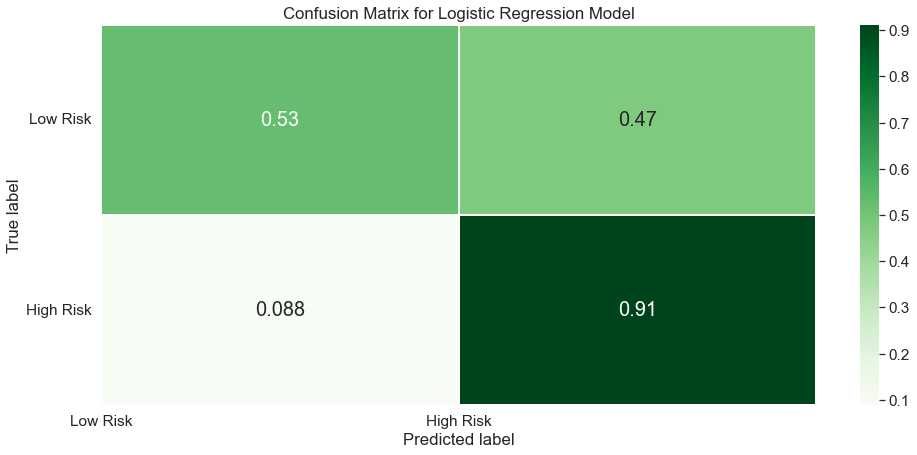

In [81]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix,annot=True, annot_kws={'size':20},
           cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the figure 
class_names = ['Low Risk', 'High Risk']
tick_marks =np.arange(len(class_names))
tick_marks2= tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [64]:
# Classification report 
target_names= ['low risk', 'high risk']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    low risk       0.86      0.53      0.65      2351
   high risk       0.66      0.91      0.77      2351

    accuracy                           0.72      4702
   macro avg       0.76      0.72      0.71      4702
weighted avg       0.76      0.72      0.71      4702



In [65]:
# Train a Random Forest Classificer model on the scaled data and print the model score 
clf_rf = RandomForestClassifier(random_state = 42, n_estimators =500).fit(X_train_scaled, y_label_train)
print(f'Testing Score: {clf_rf.score(X_test_scaled, y_label_test)}')

Testing Score: 0.6150574223734581


In [68]:
# Confusion matrix for RF model 
y_true1 = y_label_test
y_pred1= clf_rf.predict(X_test_scaled)
confusion_matrix(y_true1, y_pred1)

array([[ 767, 1584],
       [ 226, 2125]], dtype=int64)

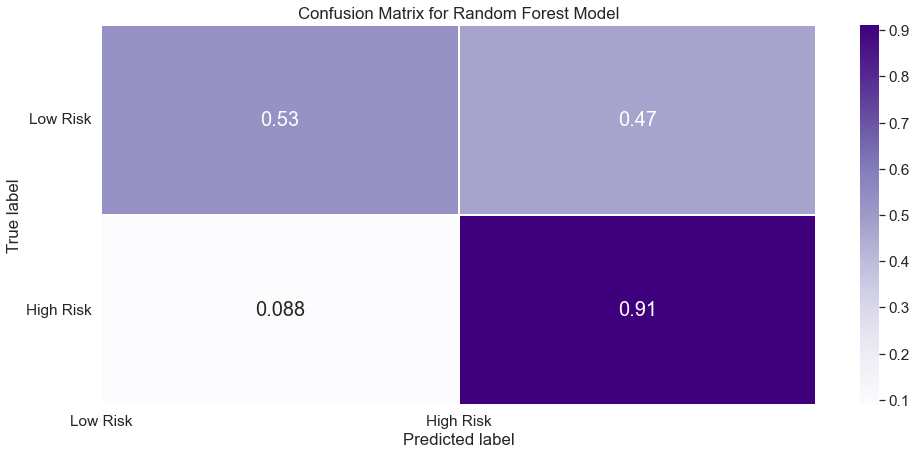

In [80]:
# Get and reshape confusion matrix data 
mtrix = confusion_matrix (y_true1, y_pred1)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix,annot=True, annot_kws={'size':20},
           cmap=plt.cm.Purples, linewidths=0.2)

# Add Labels to the plot
class_names=['Low Risk', 'High Risk']
tick_marks=np.arange(len(class_names))
tick_marks2= tick_marks+0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()